In [3]:
from torch import nn

from multi_modal_edge_ai.adl_inference.data_access.parser import parse_file
from multi_modal_edge_ai.adl_inference.ml_models.cnn_model import CNNModel
from multi_modal_edge_ai.adl_inference.preprocessing.encoder import Encoder
from multi_modal_edge_ai.adl_inference.validating.validate import split_and_validate


(sdf, adf) = parse_file(r'../public_dataset/OrdonezA_Sensors.csv', r'../public_dataset/OrdonezA_ADLs.csv')

adls = adf['Activity'].unique().tolist()
adl_encoder = Encoder(adls)

# If you want to replace the existing 'Activity' column with encoded values
adf['Activity'] = adf['Activity'].apply(adl_encoder.encode_label)

sensors = sdf['Sensor'].unique().tolist()

model = CNNModel(6, 3, 160, 300, sensors, len(adls), nn.ReLU(), nn.LogSoftmax(dim=-1))

In [4]:
result = split_and_validate(data=sdf, ground_truth=adf, model=model, labels=adls, label_encoder = adl_encoder, window_length_seconds=300, window_slide_seconds=150)



Training started....
Epoch 1/10, Loss: 1942.745540834022
Epoch 2/10, Loss: 1335.3442488747032
Epoch 3/10, Loss: 1232.38852946747
Epoch 4/10, Loss: 1177.9309650209843
Epoch 5/10, Loss: 1159.2959194271166
Epoch 6/10, Loss: 1113.0027237565378
Epoch 7/10, Loss: 1098.7953049966363
Epoch 8/10, Loss: 1045.4276273439882
Epoch 9/10, Loss: 1011.7634275336278
Epoch 10/10, Loss: 1054.4674042031559


Training completed.


In [5]:
import pandas as pd

print('\n')
print('Accuracy =' + str(result[0]))



Accuracy =0.9323899371069182


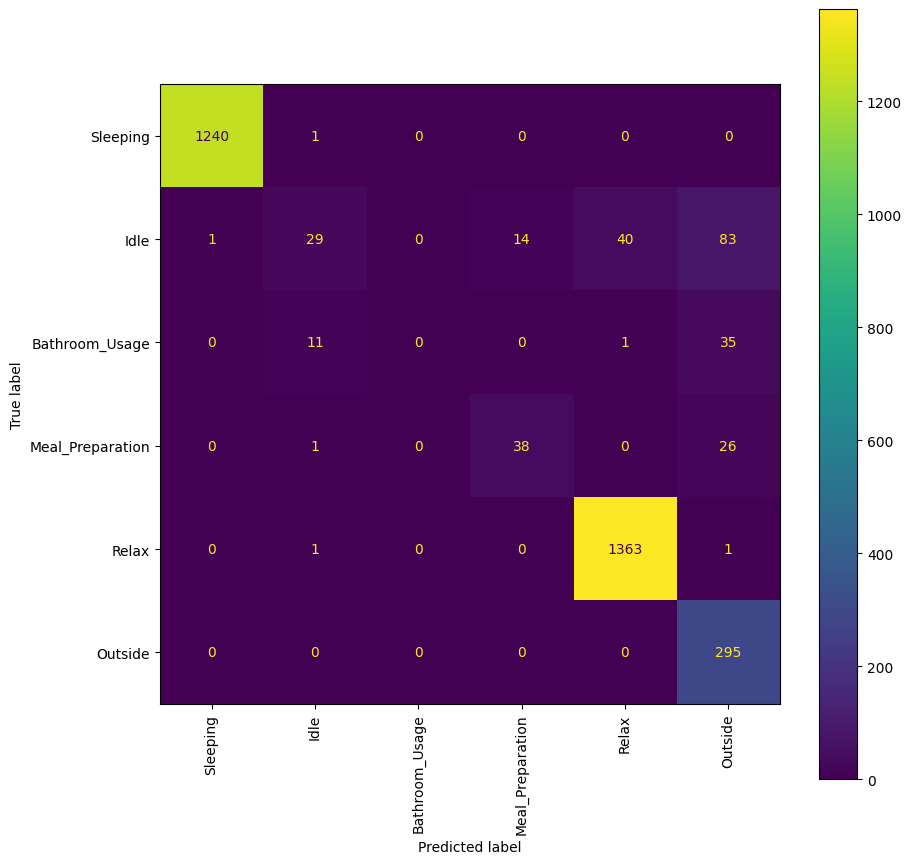

In [6]:
import matplotlib.pyplot as plt
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = result[1], display_labels = adls)
fig, ax = plt.subplots(figsize=(10,10))
cm_display.plot(ax=ax, xticks_rotation='vertical')
plt.show()